In [110]:
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [88]:
employment = Table.read_table('CDC-Employment-Cleaned-2.csv').drop('Jobs Lost')
display(employment)

industry,subindustry,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Space economy,--,433,432,426,424,411,399,387,390,365,351,361,373
Mining,--,0,0,0,0,0,0,0,0,0,0,0,0
Mining,Oil and gas extraction,0,0,0,0,0,0,0,0,0,0,0,0
Mining,"Mining, except oil and gas",0,0,0,0,0,0,0,0,0,0,0,0
Mining,Support activities for mining,0,0,0,0,0,0,0,0,0,0,0,0
Utilities,--,0,0,0,0,0,0,0,0,0,0,0,0
Construction,--,1,1,1,1,1,2,1,2,2,2,3,2
Manufacturing,--,136,137,133,131,128,118,116,123,112,111,104,109
Manufacturing,Wood products,0,0,0,0,0,0,0,0,0,0,0,0
Manufacturing,Nonmetallic mineral products,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
total_vals = np.array(employment.drop('industry','subindustry').row(0))
years = np.arange(2012, 2024)

In [90]:
# Shares = industry employment / total employment each year
# How much stake in total employment for the year that particular industry dominated
shares = []
for year in np.arange(2012, 2024):
    industry_vals = employment.column(str(year))
    shares.append(industry_vals / total_vals[year-2012])

share_table = employment.select('industry','subindustry')
for year in np.arange(2012,2024):
    share_table = share_table.with_column(str(year)+" share", shares[year-2012])
share_table.show(10)

industry,subindustry,2012 share,2013 share,2014 share,2015 share,2016 share,2017 share,2018 share,2019 share,2020 share,2021 share,2022 share,2023 share
Space economy,--,1,1,1,1,1,1,1,1,1,1,1,1
Mining,--,0,0,0,0,0,0,0,0,0,0,0,0
Mining,Oil and gas extraction,0,0,0,0,0,0,0,0,0,0,0,0
Mining,"Mining, except oil and gas",0,0,0,0,0,0,0,0,0,0,0,0
Mining,Support activities for mining,0,0,0,0,0,0,0,0,0,0,0,0
Utilities,--,0,0,0,0,0,0,0,0,0,0,0,0
Construction,--,0.00230947,0.00231481,0.00234742,0.00235849,0.00243309,0.00501253,0.00258398,0.00512821,0.00547945,0.00569801,0.00831025,0.00536193
Manufacturing,--,0.314088,0.31713,0.312207,0.308962,0.311436,0.295739,0.299742,0.315385,0.306849,0.316239,0.288089,0.292225
Manufacturing,Wood products,0,0,0,0,0,0,0,0,0,0,0,0
Manufacturing,Nonmetallic mineral products,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
# Compute year to year total change
total_changes = np.diff(total_vals)

# How mich each industry contributed to fluctuations in total employment from one year to the next
contributions = []
for row in range(employment.num_rows):
    industry_vals = np.array([employment.column(str(year))[row] for year in years])
    industry_changes = np.diff(industry_vals)
    contribs = industry_changes / total_changes  
    contributions.append(contribs)

contributions = np.array(contributions) 

contribution_table = employment.select('industry','subindustry')
for year in np.arange(2012,2023):
    contribution_table = contribution_table.with_column(str(year)+" contribution", contributions[:,year-2012])
contribution_table.show(10)

industry,subindustry,2012 contribution,2013 contribution,2014 contribution,2015 contribution,2016 contribution,2017 contribution,2018 contribution,2019 contribution,2020 contribution,2021 contribution,2022 contribution
Space economy,--,1,1,1,1,1,1,1,1,1,1,1
Mining,--,-0,-0,-0,-0,-0,-0,0,-0,-0,0,0
Mining,Oil and gas extraction,-0,-0,-0,-0,-0,-0,0,-0,-0,0,0
Mining,"Mining, except oil and gas",-0,-0,-0,-0,-0,-0,0,-0,-0,0,0
Mining,Support activities for mining,-0,-0,-0,-0,-0,-0,0,-0,-0,0,0
Utilities,--,-0,-0,-0,-0,-0,-0,0,-0,-0,0,0
Construction,--,-0,-0,-0,-0,-0.0833333,0.0833333,0.333333,-0,-0,0.1,-0.0833333
Manufacturing,--,-1,0.666667,1,0.230769,0.833333,0.166667,2.33333,0.44,0.0714286,-0.7,0.416667
Manufacturing,Wood products,-0,-0,-0,-0,-0,-0,0,-0,-0,0,0
Manufacturing,Nonmetallic mineral products,-0,-0,-0,-0,-0,-0,0,-0,-0,0,0


In [92]:
volatility = np.std(contributions, axis=1)

vol_table = employment.select("industry", "subindustry").with_column("Contribution Volatility", volatility).sort("Contribution Volatility", descending=True)

vol_table.show(10)

industry,subindustry,Contribution Volatility
Information,--,1.53423
Information,Broadcasting and telecommunications,1.53423
Wholesale trade,--,1.42006
Manufacturing,--,0.837706
Manufacturing,Other transportation equipment,0.67476
Professional and business services,"Miscellaneous professional, scientific, and technical se ...",0.668956
Manufacturing,Computer and electronic products,0.646456
Professional and business services,--,0.462188
"Educational services, health care, and social assistance",--,0.431129
"Educational services, health care, and social assistance",Educational services,0.366033


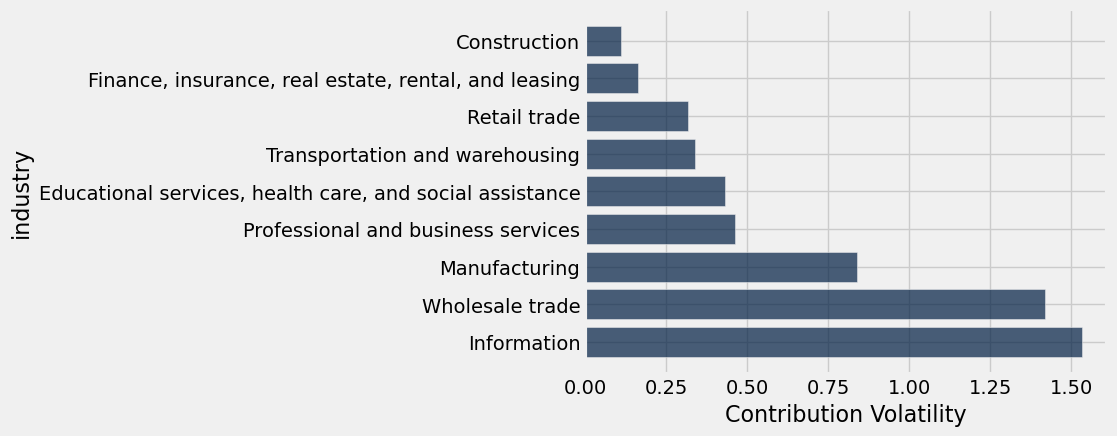

In [93]:
vol_table.where('subindustry','--').drop('subindustry').where('Contribution Volatility',are.above(0)).sort('Contribution Volatility').barh('industry')

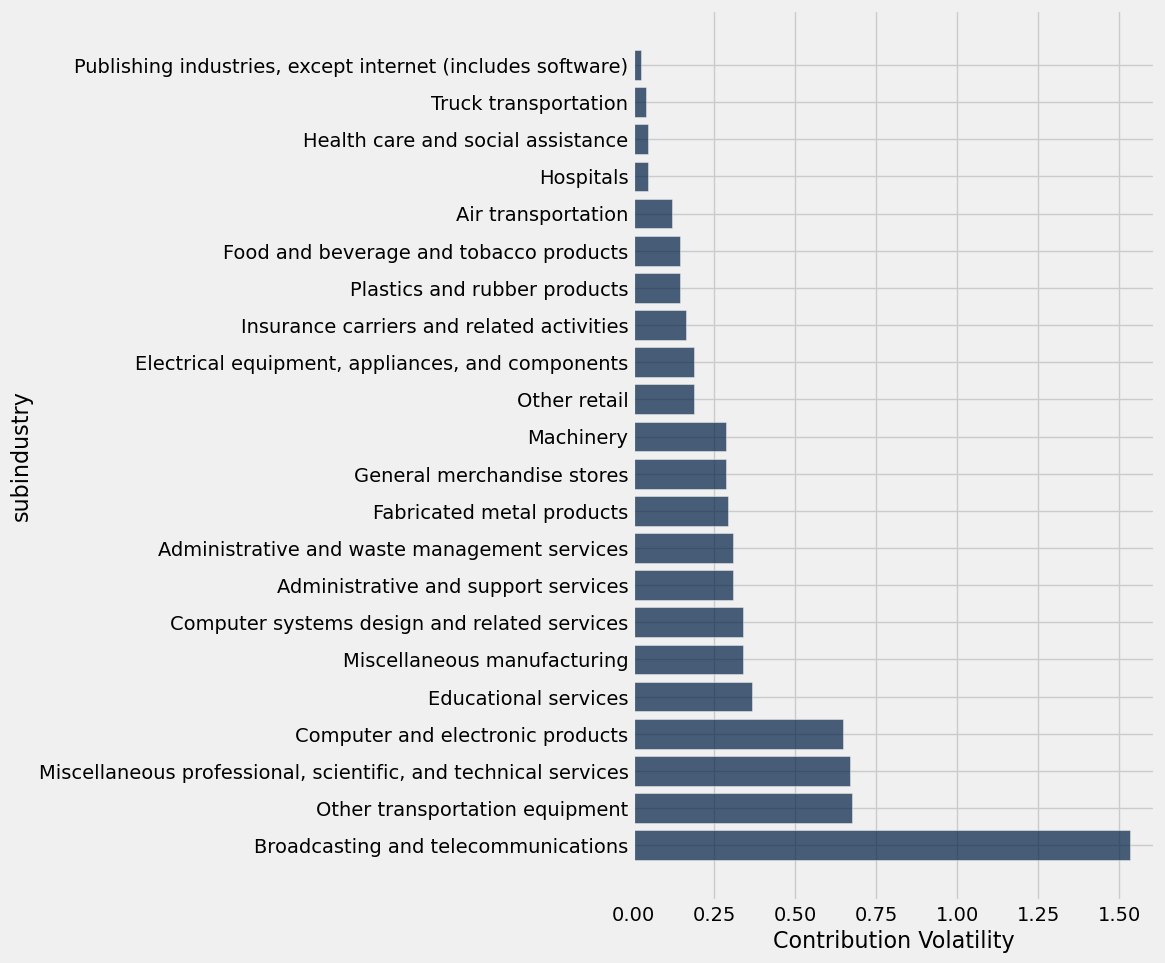

In [94]:
vol_table.where('subindustry',are.not_containing('--')).where('Contribution Volatility',are.above(0)).drop('industry').sort('Contribution Volatility').barh('subindustry')

**Adding Compensation Data**

In [95]:
compensation = Table.read_table('CDC-Compensation-Cleaned-2.csv')
display(compensation)

industry,subindustry,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Space economy,--,47687.9,47705.5,47208.1,49100.7,48817.7,49104,47595.6,50592.9,49032.4,47793.4,46578.7,47372.7
Mining,--,10.73,8.44,9.25,11.2,7.13,2,0.98,0.96,0.95,0,0,0
Mining,Oil and gas extraction,5.37,4.22,5.14,7.13,4.07,1,0,0,0,0,0,0
Mining,"Mining, except oil and gas",0,0,0,0,0,0,0,0,0,0,0,0
Mining,Support activities for mining,5.37,4.22,4.11,4.07,3.05,1,0,0.96,0,0,0,0
Utilities,--,0,0,0,1.02,1.02,1,0,0,0,0,0,0
Construction,--,130.92,105.52,174.69,215.8,217.83,322,204.32,626.09,513.47,306.79,387.2,415.46
Manufacturing,--,20856.4,20400.8,19713.1,20192.2,20457.8,20303,20071.2,23054.7,22060.3,21815.9,19577,19849
Manufacturing,Wood products,6.44,3.17,5.14,1.02,1.02,1,0.98,0.96,0.95,1.82,0.85,0.82
Manufacturing,Nonmetallic mineral products,22.54,24.27,24.66,10.18,10.18,10,9.78,8.66,8.54,8.17,8.47,8.18


In [96]:
total_vals = np.array(compensation.drop('industry','subindustry').row(0))
years = np.arange(2012,2024)

In [97]:
# Average compensation per employee
avg_comp = []
for year in np.arange(2012,2024):
    comp_vals = 1000000 * compensation.column(str(year))
    employment_vals = 1000 * employment.column(str(year)) 
    avg_comp.append(comp_vals / employment_vals)

avg_comp_table = compensation.select('industry','subindustry')
for year in np.arange(2012,2024):
    avg_comp_table = avg_comp_table.with_column(str(year)+" average compensation", avg_comp[year-2012])
avg_comp_table.show(10)

C:\Users\monke\AppData\Local\Temp\ipykernel_1052\2171422455.py:6: RuntimeWarning: divide by zero encountered in divide
  avg_comp.append(comp_vals / employment_vals)
C:\Users\monke\AppData\Local\Temp\ipykernel_1052\2171422455.py:6: RuntimeWarning: invalid value encountered in divide
  avg_comp.append(comp_vals / employment_vals)


industry,subindustry,2012 average compensation,2013 average compensation,2014 average compensation,2015 average compensation,2016 average compensation,2017 average compensation,2018 average compensation,2019 average compensation,2020 average compensation,2021 average compensation,2022 average compensation,2023 average compensation
Space economy,--,110134,110429,110817,115803,118778,123068,122986,129725,134335,136164,129027,127005
Mining,--,inf,inf,inf,inf,inf,inf,inf,inf,inf,nan,nan,nan
Mining,Oil and gas extraction,inf,inf,inf,inf,inf,inf,nan,nan,nan,nan,nan,nan
Mining,"Mining, except oil and gas",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Mining,Support activities for mining,inf,inf,inf,inf,inf,inf,nan,inf,nan,nan,nan,nan
Utilities,--,nan,nan,nan,inf,inf,inf,nan,nan,nan,nan,nan,nan
Construction,--,130920,105520,174690,215800,217830,161000,204320,313045,256735,153395,129067,207730
Manufacturing,--,153356,148911,148219,154139,159827,172059,173027,187436,196967,196540,188241,182101
Manufacturing,Wood products,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
Manufacturing,Nonmetallic mineral products,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


In [98]:
# Number of jobs created in each industry per one million dollars of investment
jobs_per_million = []
for year in np.arange(2012, 2024):
    jobs_per_million.append(1000000 / avg_comp_table.column(str(year)+' average compensation'))

jobs_per_million_table = compensation.select('industry','subindustry')
for year in np.arange(2012,2024):
    jobs_per_million_table = jobs_per_million_table.with_column(str(year)+' jobs per million $', jobs_per_million[year-2012])
jobs_per_million_table.show(10)

industry,subindustry,2012 jobs per million $,2013 jobs per million $,2014 jobs per million $,2015 jobs per million $,2016 jobs per million $,2017 jobs per million $,2018 jobs per million $,2019 jobs per million $,2020 jobs per million $,2021 jobs per million $,2022 jobs per million $,2023 jobs per million $
Space economy,--,9.07987,9.05556,9.02388,8.63532,8.41908,8.12561,8.13101,7.70859,7.44406,7.3441,7.75032,7.87374
Mining,--,0,0,0,0,0,0,0,0,0,nan,nan,nan
Mining,Oil and gas extraction,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan
Mining,"Mining, except oil and gas",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Mining,Support activities for mining,0,0,0,0,0,0,nan,0,nan,nan,nan,nan
Utilities,--,nan,nan,nan,0,0,0,nan,nan,nan,nan,nan,nan
Construction,--,7.63825,9.47688,5.72443,4.63392,4.59074,6.21118,4.89428,3.19443,3.89507,6.51912,7.74793,4.81394
Manufacturing,--,6.52079,6.71544,6.74678,6.48766,6.25677,5.81195,5.77943,5.33515,5.07698,5.08803,5.31235,5.49145
Manufacturing,Wood products,0,0,0,0,0,0,0,0,0,0,0,0
Manufacturing,Nonmetallic mineral products,0,0,0,0,0,0,0,0,0,0,0,0


In [99]:
# Calculate average contribution over the years for each industry
contributions_sum = contribution_table.column('2012 contribution')
for year in np.arange(2013,2023):
    contributions_sum = contributions_sum + contribution_table.column(str(year)+' contribution')

average_contributions = contributions_sum / 11

average_contributions_table = compensation.select('industry','subindustry').with_column('average contribution',average_contributions)

# Calculate average number of jobs per 1 million dollars invested
jobs_per_million_sum = jobs_per_million_table.column('2012 jobs per million $')
for year in np.arange(2013, 2024):
    jobs_per_million_sum = jobs_per_million_sum + jobs_per_million_table.column(str(year)+' jobs per million $')

jobs_per_million_average = jobs_per_million_sum / 12

average_contributions_table = average_contributions_table.with_column('average jobs per million $',jobs_per_million_average)
average_contributions_table.show(10)

industry,subindustry,average contribution,average jobs per million $
Space economy,--,1,8.21593
Mining,--,0,nan
Mining,Oil and gas extraction,0,nan
Mining,"Mining, except oil and gas",0,nan
Mining,Support activities for mining,0,nan
Utilities,--,0,nan
Construction,--,0.0318182,5.77835
Manufacturing,--,0.405351,5.88523
Manufacturing,Wood products,0,0
Manufacturing,Nonmetallic mineral products,0,0


In [100]:
# Calculate efficiency of increasing jobs with (average # jobs per $1 mil * average contribution) for each industry
average_contributions_table = average_contributions_table.with_column('efficiency',
                                                                      average_contributions_table.column('average jobs per million $') * average_contributions_table.column('average contribution'))
# Clean up data
average_contributions_table = average_contributions_table.where('efficiency',are.above(0)).sort('efficiency',descending=True).where('industry',are.not_containing('Space economy'))
average_contributions_table

industry,subindustry,average contribution,average jobs per million $,efficiency
"Educational services, health care, and social assistance",--,0.179244,17.3289,3.10611
Manufacturing,--,0.405351,5.88523,2.38559
"Educational services, health care, and social assistance",Educational services,0.109547,17.3626,1.90203
Manufacturing,Other transportation equipment,0.235028,7.10859,1.67072
Transportation and warehousing,--,0.119524,12.6668,1.51398
Wholesale trade,--,0.131299,10.3991,1.36539
Manufacturing,Computer and electronic products,0.301469,4.52583,1.3644
Manufacturing,Machinery,0.1,10.9833,1.09833
Information,Broadcasting and telecommunications,0.0609257,9.55245,0.58199
Information,--,0.0609257,9.44169,0.575242


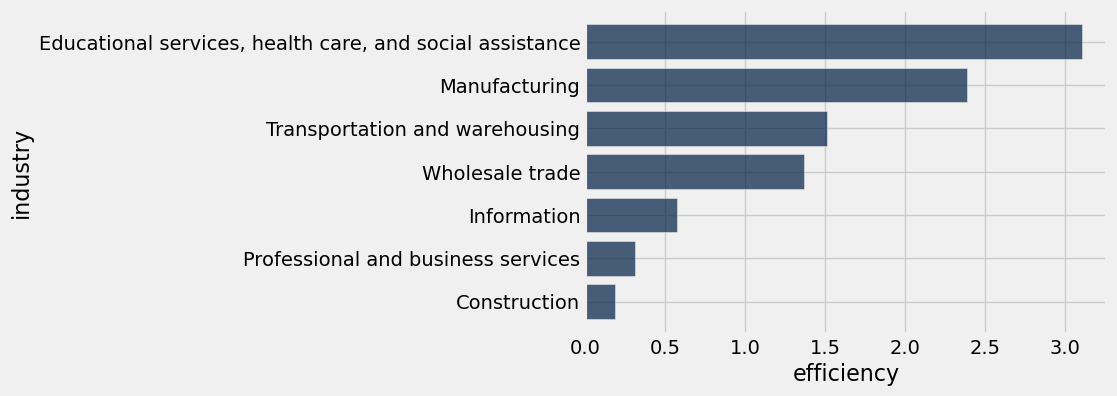

In [101]:
average_contributions_table.where('subindustry','--').drop('subindustry').barh('industry','efficiency')

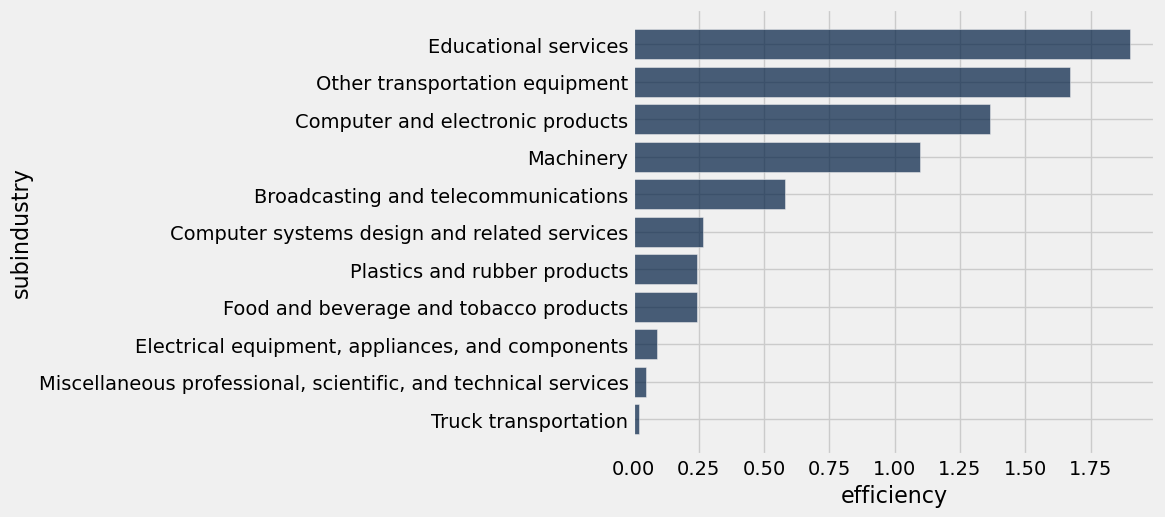

In [102]:
average_contributions_table.where('subindustry',are.not_containing('--')).drop('industry').barh('subindustry','efficiency')

Subindustry Key:
1: Educational services
2: Other transportation equipment
3: Computer and electronic products
4: Machinery
5: Broadcasting and telecommunications
6: Computer systems design and related services
7: Plastics and rubber products
8: Food and beverage and tobacco products
9: Electrical equipment, appliances, and components
10: Miscellaneous professional, scientific, and technical services
11: Truck transportation


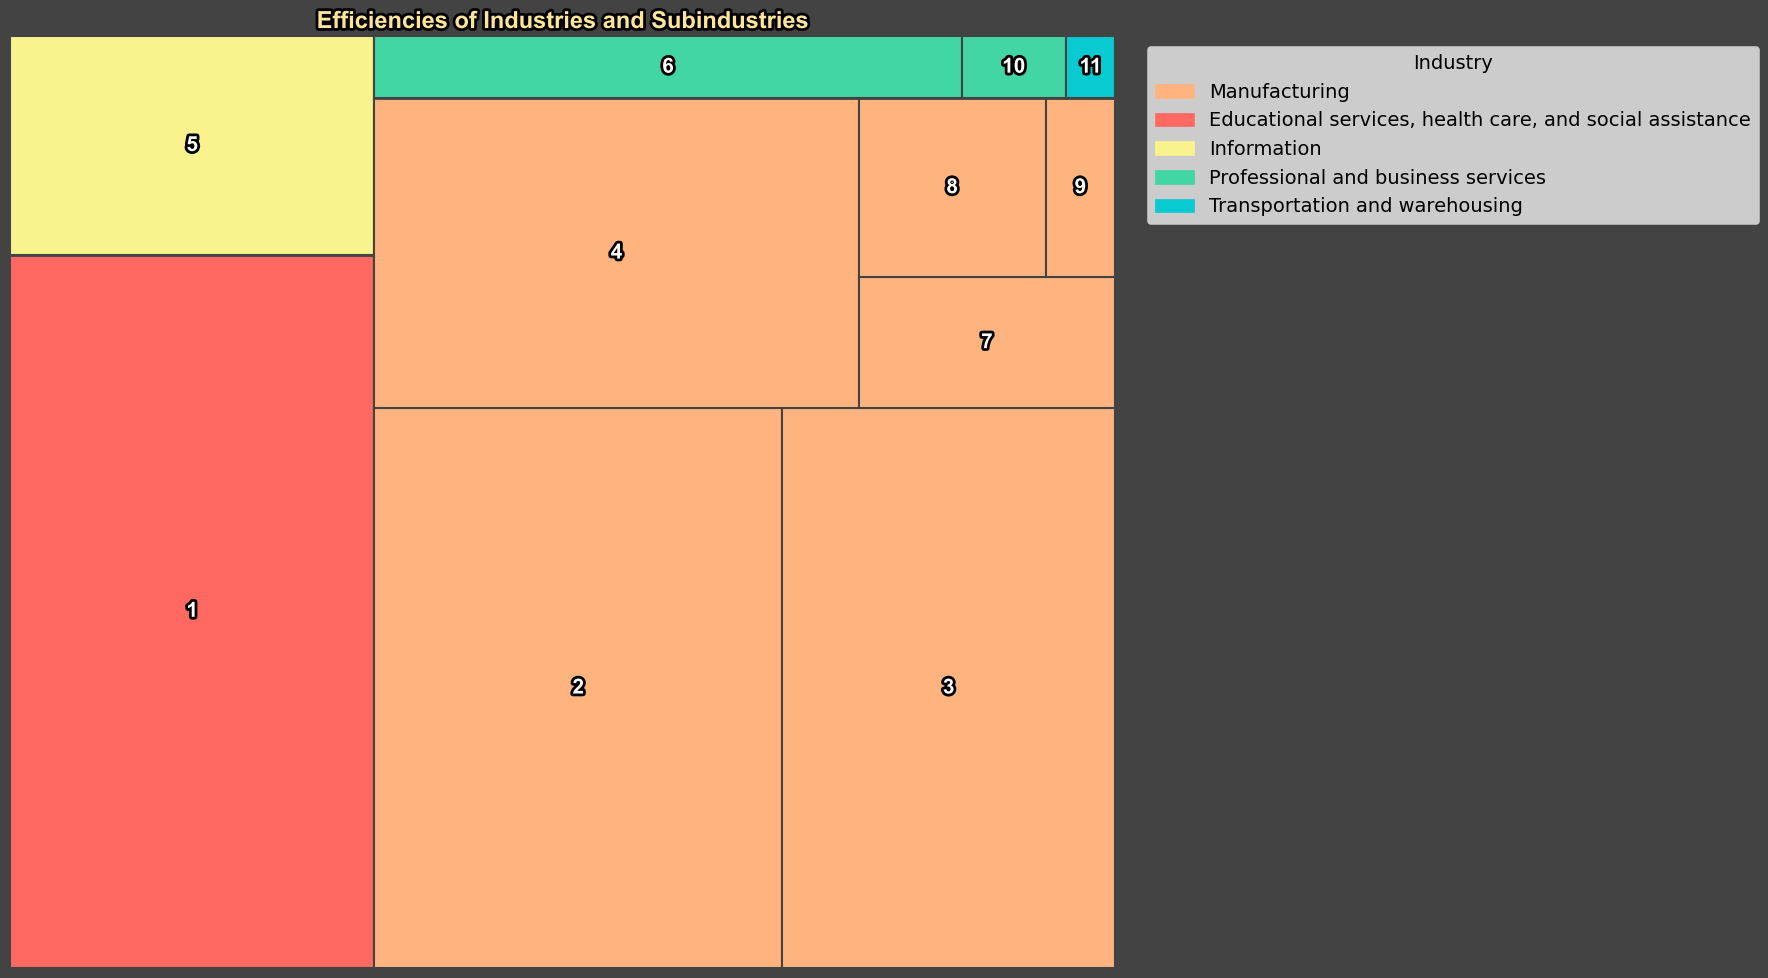

In [111]:
# ChatGPT used to help create code for the visualization

import squarify
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.patheffects as pe

# Convert Table to DataFrame
df = average_contributions_table.to_df()

# Filter only subindustries
df = df[df["subindustry"] != "--"].reset_index(drop=True)

# Assign numeric ID for each subindustry
df["ID"] = df.index + 1

# --- CUSTOMIZABLE SETTINGS ---
background_color = "#434343ff"  # figure and axes background
text_color = "white"
text_outline_color = "black"
font_name = "Arial"  # Can change to any installed font
use_custom_colors = True

if use_custom_colors:
    # Define your block colors (for industries)
    custom_colors = ['#ff6961','#ffb480','#f8f38d','#42d6a4','#08cad1','#59adf6','#9d94ff','#c780e8']
    industries = df["industry"].unique()
    industry_color_map = {ind: custom_colors[i % len(custom_colors)] for i, ind in enumerate(industries)}
else:
    industries = df["industry"].unique()
    cmap = cm.get_cmap("Set3", len(industries))
    industry_color_map = {ind: cmap(i) for i, ind in enumerate(industries)}

# --- Compute top-level sizes for industries ---
industry_sizes = df.groupby("industry")["efficiency"].sum()
normed_sizes = squarify.normalize_sizes(industry_sizes, 100, 100)
industry_rects = squarify.squarify(normed_sizes, 0, 0, 100, 100)

# --- Plot ---
plt.figure(figsize=(18,10), facecolor=background_color)
ax = plt.gca()
ax.set_facecolor(background_color)

for ind_rect, (industry, group) in zip(industry_rects, df.groupby("industry")):
    x0, y0, w0, h0 = ind_rect['x'], ind_rect['y'], ind_rect['dx'], ind_rect['dy']
    
    # Draw industry rectangle border
    ax.add_patch(plt.Rectangle((x0, y0), w0, h0, facecolor='none', edgecolor=background_color, lw=2))
    
    # Subindustry rectangles
    sub_sizes = group["efficiency"].values
    sub_sizes_norm = squarify.normalize_sizes(sub_sizes, w0, h0)
    sub_rects = squarify.squarify(sub_sizes_norm, x0, y0, w0, h0)
    
    for rect, color, sid in zip(sub_rects, [industry_color_map[industry]]*len(sub_rects), group["ID"]):
        rx, ry, rw, rh = rect['x'], rect['y'], rect['dx'], rect['dy']
        ax.add_patch(plt.Rectangle((rx, ry), rw, rh, facecolor=color, edgecolor=background_color, lw=1.5))
        # ID numbers
        ax.text(
            rx + rw/2, ry + rh/2, str(sid),
            ha='center', va='center', color=text_color, fontsize=15, fontweight='bold', fontname=font_name,
            path_effects=[pe.withStroke(linewidth=4, foreground=text_outline_color)]
        )

ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.axis('off')
plt.title("Efficiencies of Industries and Subindustries", fontsize=17, weight='bold', fontname=font_name, color='#ffe599',path_effects=[pe.withStroke(linewidth=4, foreground=text_outline_color)])

# --- Legend --- 
industry_totals = df.groupby("industry")["efficiency"].sum().sort_values(ascending=False)
sorted_industries = industry_totals.index.tolist()
patches = [mpatches.Patch(color=industry_color_map[ind], label=ind) for ind in sorted_industries]
plt.legend(handles=patches, title="Industry", loc='upper left', bbox_to_anchor=(1.02, 1))

# Subindustry key
print("Subindustry Key:")
for i, row in df.iterrows():
    print(f"{row['ID']}: {row['subindustry']}")

plt.tight_layout()
plt.show()